<a href="https://colab.research.google.com/github/sebastianrdz/portafolio-analisis/blob/main/Modulo1_Salarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Momento de Retroalimentación: Módulo 1 Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos (Portafolio Análisis)

## Importacion de datos

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")  
# !pwd

Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/MyDrive/Colab Notebooks"
# !ls  # show current directory

/content/gdrive/MyDrive/Colab Notebooks


In [3]:
# Aquí se presentan ;las librerías utilizadas en este reporte
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Lectura y exploracion de datos
Dentro de esta seccion, lo que se busca es entender y visualizar los datos con el proposito de entender cuales son los posibles valores a analizar con el proposito de llegar a una conclucion concreta. 

In [4]:
# Lectura de datos
data = pd.read_csv("ds_salaries.csv")
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [7]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [9]:
data.sample()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
130,2021,EN,FT,Machine Learning Developer,100000,USD,100000,IQ,50,IQ,S


In [10]:
sns.set(rc={'figure.figsize': [15, 7]}, font_scale=1.2)
sns.set_style("whitegrid")

In [11]:
data.corr()

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


Text(0.5, 1.0, 'Trabajo por año')

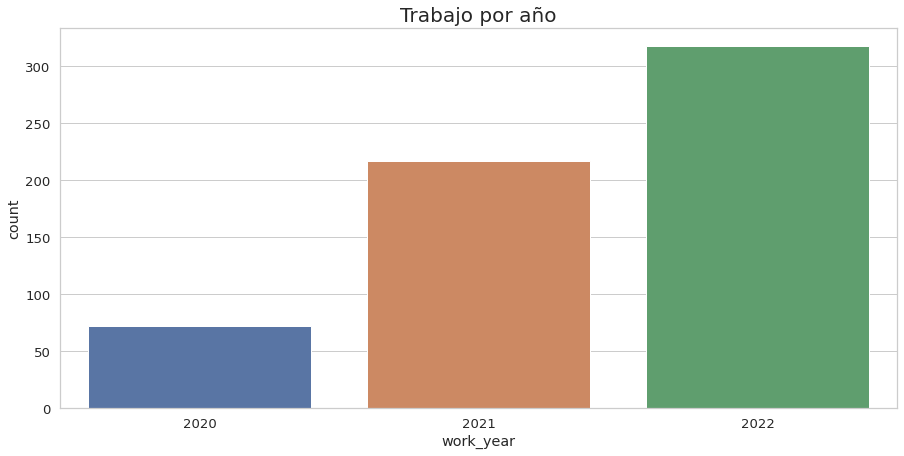

In [12]:
sns.countplot(x=data['work_year'])
plt.title("Trabajo por año",fontsize=20)

Text(0.5, 1.0, 'Puesto')

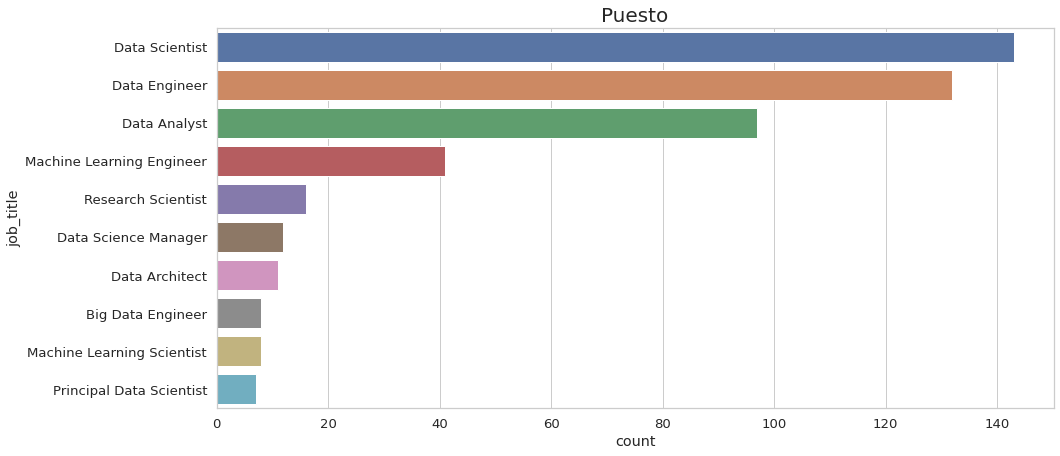

In [13]:
sns.countplot(y=data['job_title'],order=data['job_title'].value_counts().head(10).index)
plt.title("Puesto",fontsize=20)

Text(0.5, 1.0, 'Experiencia (mid, senior, entry, excecutive)')

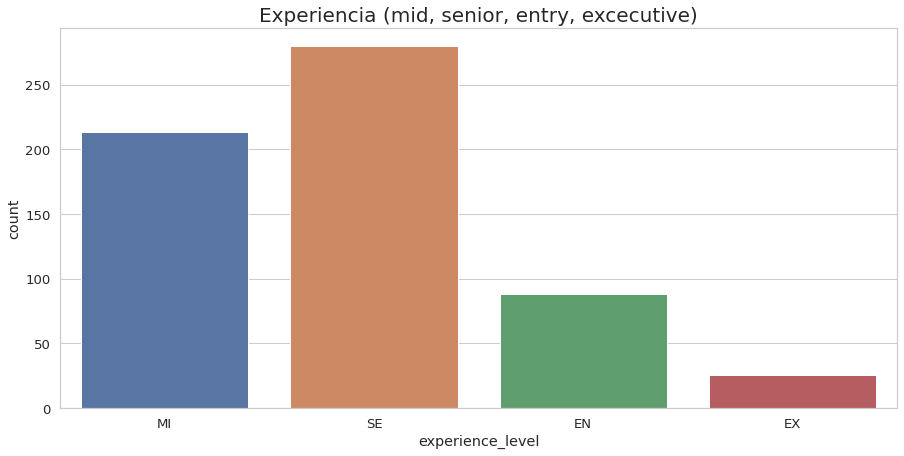

In [14]:
sns.countplot(data=data, x=data.experience_level)
plt.title("Experiencia (mid, senior, entry, excecutive)",fontsize=20)

Text(0.5, 1.0, 'Tamano de compañía')

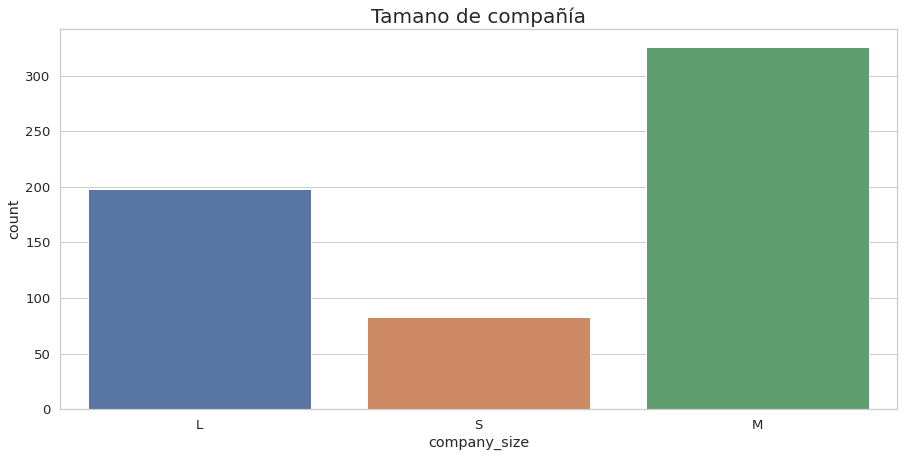

In [15]:
sns.countplot(data=data, x=data.company_size)
plt.title("Tamano de compañía",fontsize=20)

Text(0.5, 1.0, 'Estatus de trabajo')

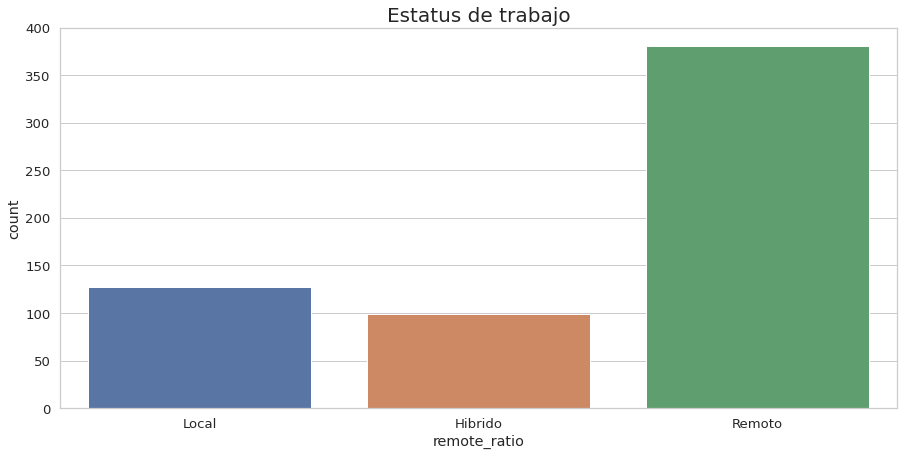

In [16]:
sns.countplot(data=data, x=data.remote_ratio).set_xticklabels(["Local", "Hibrido", "Remoto"])
plt.title("Estatus de trabajo",fontsize=20)

Text(0.5, 1.0, 'Moneda')

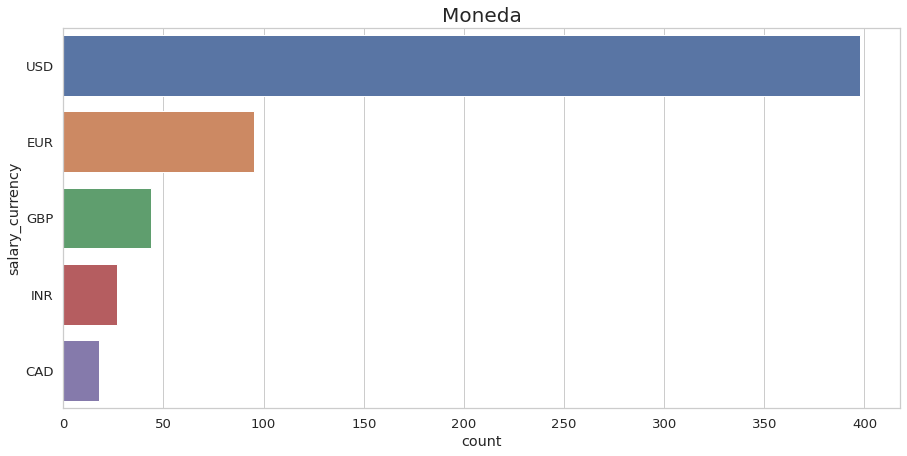

In [17]:
sns.countplot(y=data['salary_currency'],order=data['salary_currency'].value_counts().head().index)
plt.title("Moneda",fontsize=20)

Text(0.5, 1.0, 'Lugar de Residencia')

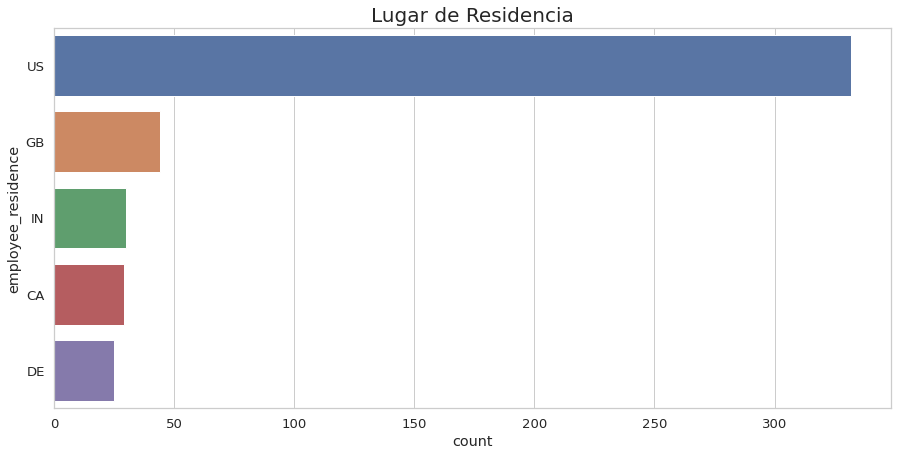

In [18]:
sns.countplot(y=data['employee_residence'],order=data['employee_residence'].value_counts().head().index)
plt.title("Lugar de Residencia",fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Salario')

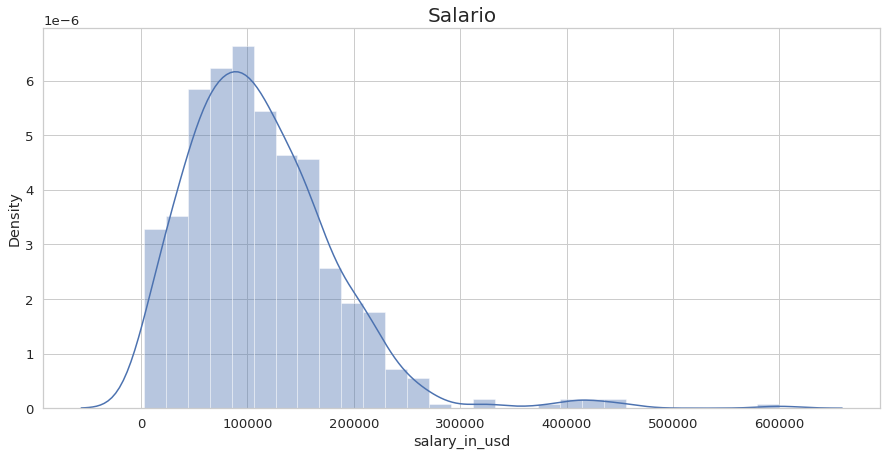

In [19]:
sns.distplot(data['salary_in_usd'])
plt.title("Salario",fontsize=20)

## Manipulación de datos

En este apartado se busca hhacer el maenjo adecuado de los datos proporiconados para poder interpretar los datos en su totalidad.



In [20]:
# Función encargada de agrupar y seleccionar los puestos de trabajo de manera concreta para su futuro análisis.
# Se transforman los datos cualitativos, a cuantitativos para ser compatibles con el modelo.
def clasificacion_job_title(x):
    if ( x.find("Data Science")>=0  or  x.find("Data Scientist")>=0   ):
        data['job_title'].replace(x,'Data Scientist',inplace = True)
    elif ( x.find("Analyst")>=0  or  x.find("Analytics")>=0 ): 
        data['job_title'].replace(x,'Data Analyst',inplace = True)
    elif ( x.find("ML")>=0  or  x.find("Machine Learning")>=0 ) :
        data['job_title'].replace(x,'Machine Learning Engineer',inplace = True) 
    elif ( x.find("Data Engineer")>=0  or  x.find("Data Engineering")>=0 ):
        data['job_title'].replace(x,'Data Engineer',inplace = True)
    else : 
        data['job_title'].replace(x,'AI related',inplace = True)

In [21]:
for i in data['job_title']:
    clasificacion_job_title(i)

In [22]:
data['job_title'].value_counts()

Data Scientist               192
Data Engineer                158
Data Analyst                 135
Machine Learning Engineer     68
AI related                    54
Name: job_title, dtype: int64

In [23]:
size = {
    "S":0,
    "M":1,
    "L":2
}
data['company_size'] = data['company_size'].map(size)

In [24]:
# Al ser la mayoría de las localidades de las personas y de las compañías de Estados Unidos, podemos diferenciar estas entre "US" y "other", lo cual nos permitirá enfocarnos en los valores significativos.
def res(x):
    if (x == "US"):
        return "US" 
    else :
        return "Other"

In [25]:
data['employee_residence'] = data['employee_residence'].apply(res)
data['company_location'] = data['company_location'].apply(res)

In [26]:
nums = data.select_dtypes(exclude="object").columns
cats = data.select_dtypes(include="object").columns

In [27]:
data = pd.get_dummies(data,columns=cats,drop_first=True)

In [28]:
X, y = data.drop("salary",axis=1) , data["salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
# Modelo de Regresión Lineal que nos permite predecir el salario según los atributos estadísticos de las personas.
LR = LinearRegression()
LR.fit(X_train,np.log(y_train))
cal_entrenamiento = LR.score(X_train,np.log(y_train))
cal_prueba = LR.score(X_test,np.log(y_test))
y_pred = LR.predict(X_test)
RMSE = mean_squared_error((y_pred),np.log(y_test))

print("Entrenamiento: " , round(cal_entrenamiento,4))
print("Prueba: " , round(cal_prueba,4))
print("Error cuadrático medio: " , round(RMSE,4))

Entrenamiento:  0.9167
Prueba:  0.8733
Error cuadrático medio:  0.1194


# Conclusión
### Preguntas
* ¿Cuál es el salario al que puede aspirar un analista de datos?
  > Un analista de datos puede aspirar a un salario promedio de 112297.8 USD.
* ¿Influye el nivel de experiencia en el salario?
  > Si, influye parcialmente. Por lo que podemos interpretar de las gráficas de arriba, los salarios rinden de un rango entre $0 - $250,000, siendo los del rango bajo los de nivel entrantes, seguidos por los de nivel medio, y luego por los de nivel senior. Los demás pocos casos que ganan mayor cantidades a estas están ligadas con los niveles ejecutivos.
* ¿Ha incrementado la demanda de analistas a lo largo del tiempo?
  > La demanda de empleo por lo general ha incrementado exponencialmente para todos los puestos desde el año 2020. La demanda por analistas está en la creciente teniendo un aumento de más del 100% en solo 2 años.

* ¿En qué países se ofrecen mejores salarios?
  > Por lo visto, Estados Unidos presenta los mejores salarios y en dólares.

---
### Resumen
Dentro de este análisis se hizo uso  de una implementación de regresión lineal con el propósito de predecir el salario de una dada persona basándonos en sus atributos como lo puede ser su compañía, su puesto, su experiencia, entre otros. Viendo á los procedimientos que se realizaron en esta práctica, lo primero que se realizó con los datos fue la visualización e interpretación de las variables las cuales son las siguientes:
1. work_year: Es el año en que la persona entró a trabajar.
2. experience_level: Es el nivel de experiencia de la persona.
3. employment_type: Es tipo de empleo, si es tiempo completo, medio tiempo, contratista o libre.
4. job_title: El título a la que la persona fue asignada en el trabajo.
5. salary: Salario de la persona.
6. salary_currency: Moneda en la que es pagado el empleado.
7. salary_in_us: Salario equivalente en USD
8. employee_residence: Residencia del empleado.
9. remote_ratio: Manera de trabajar del empleado (remoto, híbrido, presencial).
10. company_location: Lugar en el que está situado la compañía.
11. company_size: Tamaño de la compañía.

Ahora bien, lo que se hizo en primera instancia fue analizar variables cuantitativas de los datos. Entre estos analizamos el tipo de datos, la suma de datos, la media, desviación estándar, mínimo, máximo y la correlación.

Seguido de esto pasamos a analizar los atributos de una manera más cualitativa. Se realizaron diferentes gráficas para visualizar cómo están distribuidos las variables a través de todo el dataset. Entre estas el conteo de trabajadores y el año en el que entraron a trabajar, la distribución del salario entre los empleados, entre otras. Estas gráficas nos permiten visualizar las relaciones entre las variables y definir cuáles valores podemos modificar o incluso eliminar para ajustar nuestros modelos de la manera correcta.

Teniendo esto en cuenta, lo siguiente fue hacer una limpieza de los datos y ajustes a los datos con el propósito de analizar las variables cualitativas de una manera cuantitativa que nos permita definir un modelo más adecuado. Con estos valores entrenamos un modelo de regresión lineal el cual nos permite como ya mencione predecir el salario al que puede aspirar un empleado dado las variables que están definidas en la parte superior.

Como resultado obtuvimos un valor de predicción de 0.8733, lo que nos indica que de cada 100 predicciones que realicemos, el 87% de estas van a ser correctas. Se puede decir de una mejor manera que este modelo nos brinda un nivel de confianza del 87%.



